# Data Vizualization

> The greatest value of a picture is when it forces us to notice what we never expected to see.
> 
> \- John Tukey

Data visualization is used throughout the data science workflow.  It's used for everything from identifying simple relationships between variables to understanding how hyper-parameters affect model performance.  This course module will focus on exploratory data analysis using visualizations.

Note that Julia does not have a built-in plotting library, but there are many to choose from:

- [**`Gadfly`**](https://github.com/GiovineItalia/Gadfly.jl)
- [**`GR`**](https://github.com/jheinen/GR.jl)
- [**`PGFPlotsX`**](https://github.com/KristofferC/PGFPlotsX.jl)
- [**`PlotlyJS`**](https://github.com/sglyon/PlotlyJS.jl)
- [**`Plots`**](https://github.com/JuliaPlots/Plots.jl)
- [**`PyPlot`**](https://github.com/JuliaPy/PyPlot.jl)
- [**`UnicodePlots`**](https://github.com/Evizero/UnicodePlots.jl)
- [**`Winston`**](https://github.com/JuliaGraphics/Winston.jl)

If you are new to Julia, this may be an overwhelming number of options.  We highly recommend the **`Plots`** package, as it is a great option for both newcomers and power users.  This course module uses **`Plots`** and its related packages.


## What is [Plots.jl](https://github.com/JuliaPlots/Plots.jl)?

![](https://raw.githubusercontent.com/JuliaPlots/PlotReferenceImages.jl/master/PlotDocs/index/lorenz_attractor.gif)

**`Plots`** defines an interface for plotting that works with multiple plotting libraries "backends", including **`PyPlot`**, **`GR`**, and **`UnicodePlots`**.  It allows you to switch between backends, making it painless to go from an interactive javascript plot to something print-ready.  Let's get started with some of the core **`Plots`** concepts.


In [1]:
using Plots
gr()  # set the backend as GR

Plots.GRBackend()

The `plot` function has many different methods.  

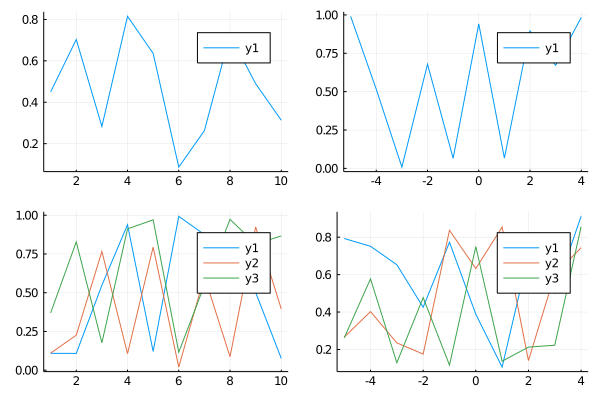

In [2]:
p1 = plot(rand(10))             # y variable only
p2 = plot(-5:4, rand(10))       # x and y variables
p3 = plot(rand(10, 3))          # multiple y variables (each column)
p4 = plot(-5:4, rand(10, 3))    # x and multiple y variables

plot(p1, p2, p3, p4)            # join plots into subplots

There are many attributes available to change via keyword arguments.

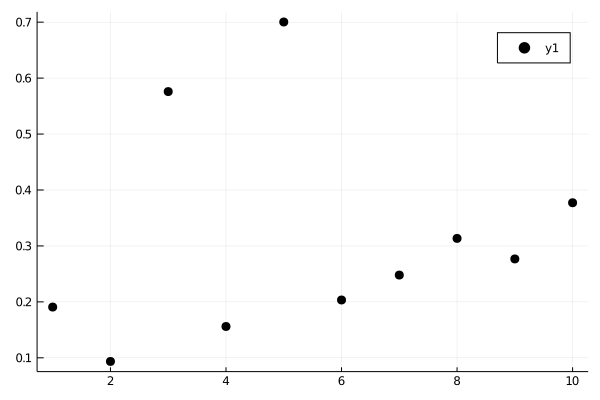

In [3]:
plot(rand(10), seriestype = :scatter, markersize = 5, markercolor = :black)

## Series Types 

One of the most important keyword arguments to `plot` is `seriestype`, as it determines how the input data is turned into a plot.  For convenience, a `seriestype` also has a function of the same name:

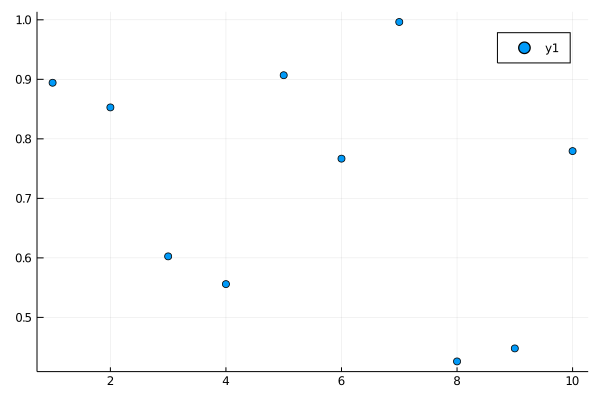

In [4]:
y = rand(10)

scatter(y)  # same as plot(y, seriestype = :scatter)

## Argument Aliases

**Plots** supports "aliases" for keyword arguments for fast interactive creation of plots.  You typically don't need to keep checking the documentation for the exact keyword.  Aliases are intuitive and you'll often be able to guess the correct syntax.

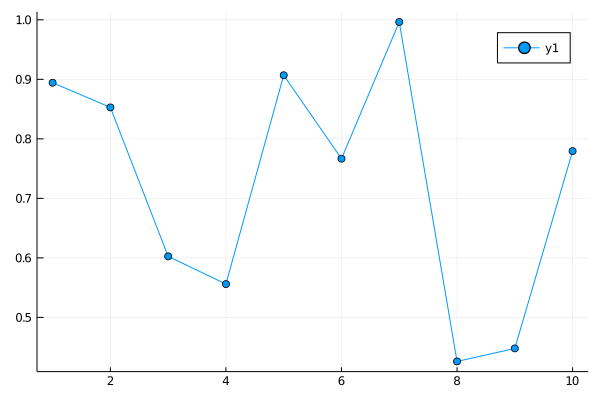

In [5]:
plot(y, markershape = :circle)

#-

plot(y, m = :circle)

## Magic Arguments

*Magic arguments* is one of **`Plots`**' unique features.  Certain keyword arguments act like "magic" where by providing a tuple, Plots intelligently maps the items to the corresponding plot element.  For example, by providing `marker = (5, .3, :auto)`, the marker size is set as 5, the marker alpha as .3, and the marker shape is automatically determined.  Note that we can also use the alias `m` rather than `marker`:

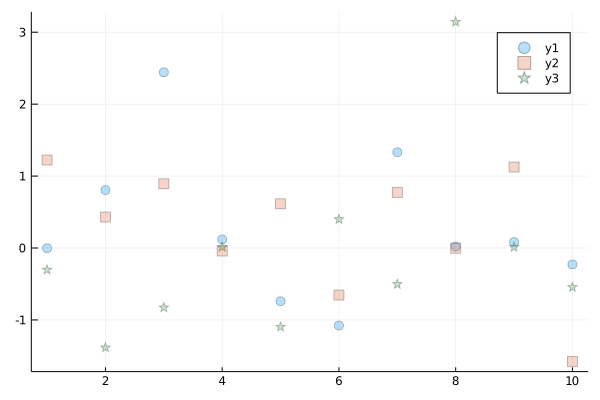

In [6]:
scatter(randn(10, 3), m = (5, .3, :auto))

## Plotting from datasets
 
Let's now use what we've learned about **`Plots`** to explore the `mtcars` dataset, extracted from a 1974 issue of of *Motor Trend* Magazine.  The variables included are:

- `Model`: Make and model of the car
- `MPG`: Miles per gallon
- `Cyl`: Number of Cylinders
- `Disp`: Displacement (cubic inches)
- `HP`: Gross horsepower
- `DRat`: Rear axle ratio
- `WT`: Weight (in 1000s lbs.)
- `QSec`: Quarter mile time
- `VS`: Engine type, V-shaped (0) or straight (1)
- `AM`: Transmission, Automatic (0) or manual (1)
- `Gear`: Number of forward gears
- `Carb`: Number of carburetors

In [9]:
using RDatasets

mtcars = dataset("datasets", "mtcars")

,Model,MPG,Cyl,Disp,HP,DRat,WT,QSec
,String,Float64,Int64,Float64,Int64,Float64,Float64,Float64
1,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46
2,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02
3,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61
4,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44
5,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02
6,Valiant,18.1,6,225.0,105,2.76,3.46,20.22
7,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84
8,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0
9,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9


First, let's `describe` the data.

In [10]:
describe(mtcars)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Model,,AMC Javelin,,Volvo 142E,32,,String
2,MPG,20.0906,10.4,19.2,33.9,,,Float64
3,Cyl,6.1875,4,6.0,8,,,Int64
4,Disp,230.722,71.1,196.3,472.0,,,Float64
5,HP,146.688,52,123.0,335,,,Int64
6,DRat,3.59656,2.76,3.695,4.93,,,Float64
7,WT,3.21725,1.513,3.325,5.424,,,Float64
8,QSec,17.8487,14.5,17.71,22.9,,,Float64
9,VS,0.4375,0,0.0,1,,,Int64


What's the relationship between miles per gallon and horsepower?  

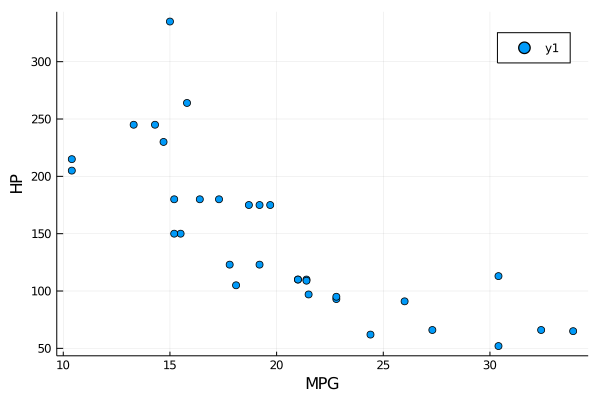

In [11]:
scatter(mtcars.MPG, mtcars.HP, xlab="MPG", ylab = "HP")

The `dataframe.column` syntax isn't always convenient for making complex visualizations.  The **`StatsPlots`** package adds a number of features to **`Plots`** for creating statistical graphics.  One of its main features is the `@df` macro that allows you to reference columns of a data table by name inside of a call to `plot`


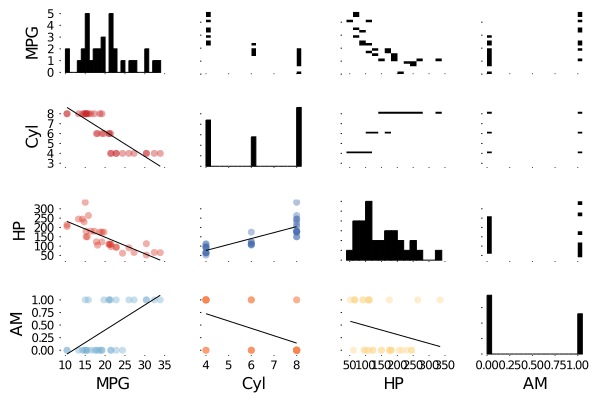

In [13]:
using StatsPlots

@df mtcars corrplot([:MPG :Cyl :HP :AM], bins=25, grid=false)


Now let's look at the distribution of `MPG` across `Cyl` using a [violin plot](https://en.wikipedia.org/wiki/Violin_plot).

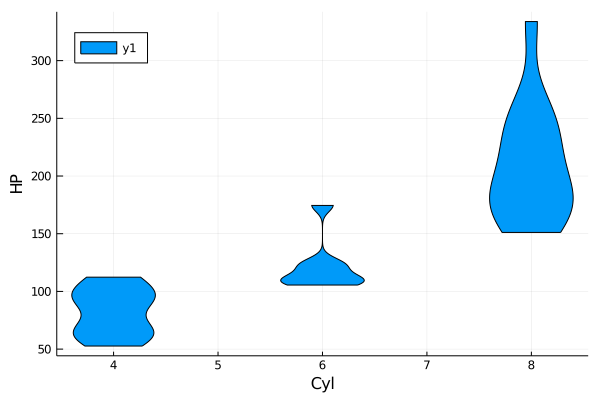

In [14]:
@df mtcars violin(:Cyl, :HP, legend = :topleft, xlab="Cyl", ylab = "HP")

**`Plots`** objects can also be mutated with additional data series.  Let's now overlap [box plots](https://en.wikipedia.org/wiki/Box_plot) of the same data, using the `alpha` keyword argument to make the box plots transparent.

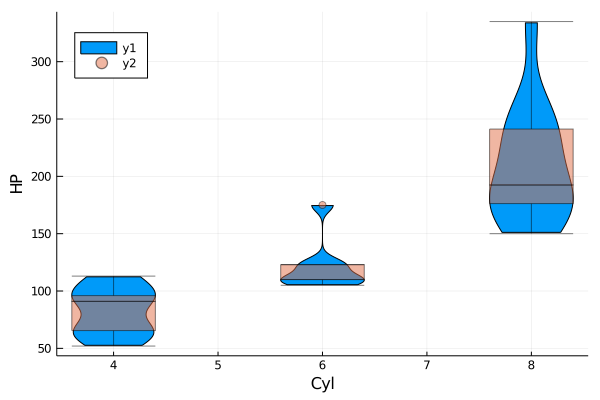

In [15]:
@df mtcars boxplot!(:Cyl, :HP, alpha = .5)